<a href="https://colab.research.google.com/github/ericrobbins27/data-x/blob/master/HW_9_Eric_Robbins%20vFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data-X Spring 2019: Homework 9

## Student name: Eric Robbins






## Student id: 3034346501

**Q1.** You have now seen how Neural networks work. You have also seen how to create and visualize neural networks using Tensorflow and Tensorboard. In this Question, you will be working on Neural networks. You will be using MNIST data (labelled images of digits) that we discussed in the class to create vanilla dense Neural network model using **tensorflow** (version 2.x is preferred, you can use 1.x as well,  **Limit the use of Keras** for solving this question) with the following characteristics:
- Input layer size of 784 (Since each image is 28 * 28)
- Three hidden layers of 300, 200 , 100
- Output layer of 10 (Since 0 - 9 digits)
- Use stochastic gradient descent
- Any other requirements can be your choice

Note that you have to define own functions for calculating loss function, optimizer to feed into the neural network.
**Plot your neural network graph (using tensorboard) and the plot of performance results (Training and Validation accuracies and loss) for every epoch**

Note: You can access MNIST data from **keras.datasets** [Link](https://keras.io/datasets/#mnist-database-of-handwritten-digits) or any standard available MNIST datasource (http://yann.lecun.com/exdb/mnist/) 

In [0]:
# from google.colab import files
# uploaded = files.upload()

In [0]:
# !unzip mnist_trimmed.zip

In [0]:
# !pip install tensorflow-gpu==2.0.0-alpha0

In [0]:
# !pip install -q tf-nightly-gpu-2.0-preview

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
tf.__version__

'2.0.0-alpha0'

In [0]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [0]:
# See what the input and output info looks like:

# Input
print('Train input shape:', x_train.shape)
print('Test input shape:', x_test.shape)
print('Input data type:', x_train.dtype, "\n")

# Output
print('Train output shape:', y_train.shape)
print('Test output shape:', y_test.shape)
print('Data type:', y_train.dtype)
print('Output labels:', np.unique(y_train), "\n")
print('First 5 outputs:')
print(y_train[:5])

Train input shape: (60000, 28, 28)
Test input shape: (10000, 28, 28)
Input data type: uint8 

Train output shape: (60000,)
Test output shape: (10000,)
Data type: uint8
Output labels: [0 1 2 3 4 5 6 7 8 9] 

First 5 outputs:
[5 0 4 1 9]


In [0]:
# Process the data to flatten inputs and convert the datatype to float
x_train_trans = x_train.reshape(60000, 784).astype('float32') / 255
x_test_trans = x_test.reshape(10000, 784).astype('float32') / 255

In [0]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

In [0]:
# Setup tensorboard
from datetime import datetime
import os
import pathlib

t = datetime.utcnow().strftime("%Y%m%d%H%M%S")
log_dir = "tf_logs"


logd = "/tmp/{}/r{}/".format(log_dir, t)

# Make directory
from pathlib import Path
home = str(Path.home())

logdir = os.path.join(os.sep, home, logd)

if not os.path.exists(logdir):
    os.makedirs(logdir)

# Create a tensorboard callback instance
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, 
                                                      write_graph=True, 
                                                      histogram_freq=1)

logdir

'/tmp/tf_logs/r20190427191931/'

### Construct the model

In [0]:
# Initialize model constructor
model = Sequential()

# Add layers
model.add(Dense(300, activation=tf.nn.relu, input_shape=(784,))) # hidden layer 1
model.add(Dense(200, activation=tf.nn.relu)) # hidden layer 2
model.add(Dense(100, activation=tf.nn.relu)) # hidden layer 3
model.add(Dense(10, activation='softmax')) # output layer

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

### Train the Model

In [0]:
num_epochs = 10

history = model.fit(x_train_trans, y_train,
                    batch_size=64,
                    epochs=num_epochs,
                    validation_split=0.2,)
                   #callbacks=[tensorboard_callback])


# Test the model
test_scores = model.evaluate(x_test_trans, y_test, verbose=0)
print('Test accuracy:', test_scores[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 64us/sample - loss: 0.9294 - accuracy: 0.7638 - val_loss: 0.3849 - val_accuracy: 0.8924
Epoch 2/10
48000/48000 [==============================] - 2s 50us/sample - loss: 0.3497 - accuracy: 0.9001 - val_loss: 0.2883 - val_accuracy: 0.9175
Epoch 3/10
48000/48000 [==============================] - 3s 57us/sample - loss: 0.2826 - accuracy: 0.9190 - val_loss: 0.2490 - val_accuracy: 0.9283
Epoch 4/10
48000/48000 [==============================] - 3s 56us/sample - loss: 0.2451 - accuracy: 0.9302 - val_loss: 0.2241 - val_accuracy: 0.9352
Epoch 5/10
48000/48000 [==============================] - 3s 56us/sample - loss: 0.2183 - accuracy: 0.9372 - val_loss: 0.2067 - val_accuracy: 0.9402
Epoch 6/10
48000/48000 [==============================] - 3s 55us/sample - loss: 0.1971 - accuracy: 0.9428 - val_loss: 0.1865 - val_accuracy: 0.9472
Epoch 7/10
48000/48000 [==============================] 

In [0]:
# Plot the neural network
print(logdir)

# Run tensorboard in the shell
!tensorboard --logdir $logdir --host=localhost

/tmp/tf_logs/r20190427191305/
TensorBoard 1.13.1 at http://localhost:6006 (Press CTRL+C to quit)


### I'm not 100% sure the tensorboard is displaying the correct nueral network. TF2 was very hard to deal with when interacting with the tensorboard. I did get tensorboard to show something...thought that was a win.

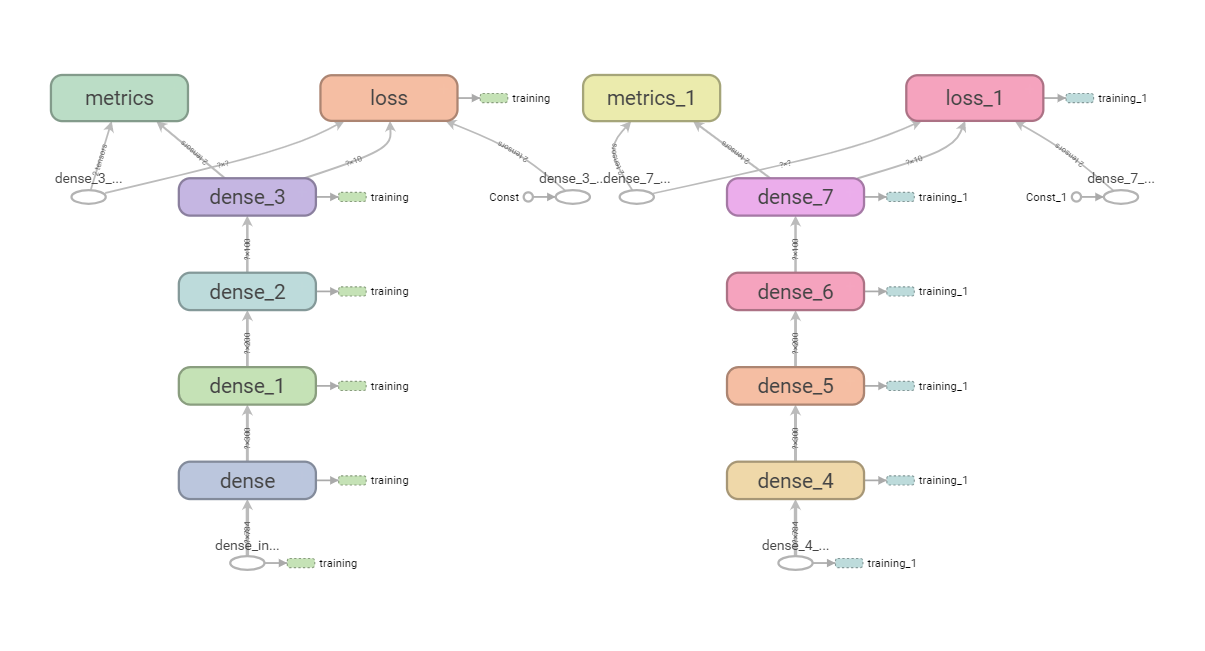

In [0]:
from IPython.display import Image
Image(filename="q1_tensorboard.png")

In [0]:
# Plot of performance results per epoch
def plot_loss_acc(hist):
    f, ax = plt.subplots()    
    ax.set_title('Train/Val Accuracy per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend(['Train Accuracy', 'Val Accuracy'], loc=0)
    
    ax.plot([None] + hist.history['accuracy'], 'o-')
    ax.plot([None] + hist.history['val_accuracy'], 'x-')
    plt.plot()
    
    f, ax = plt.subplots()
    ax.set_title('Train/Val Loss per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend(['Train Loss', 'Val Loss'], loc=0)
    
    ax.plot([None] + hist.history['loss'], 'o-', c='g')
    ax.plot([None] + hist.history['val_loss'], 'x-', c='r')
    
    plt.plot()

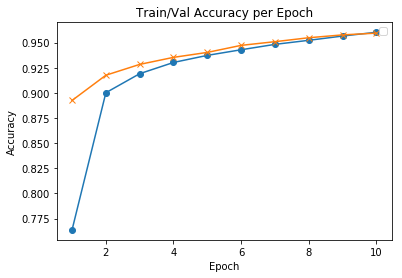

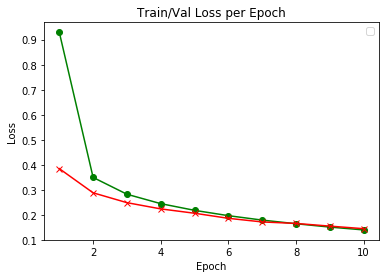

In [0]:
# Plot of performance results
plot_loss_acc(history)

**Q2.** Use transfer learning and use the Imagenet VGG16 model to train on MNIST data. You can use **Keras** for solving this question. You can choose any requirements on loss function, optimizer etc. **Plot the performance results (Training and Validation accuracies & loss) for every epoch**

In [0]:
# Load libraries
import cv2
from tensorflow.keras import applications # load VGG16 model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define variables
train_dir = './mnist_trimmed/training/'
test_dir = './mnist_trimmed/testing/'

img_width, img_height = 150, 150

n_train_samples = 40000
n_test_samples = 10000
n_epoch = 10

In [0]:
# Run model once to record the bottleneck features using image data generators:
def save_bottleneck_features():
    
    model = applications.vgg16.VGG16(include_top=False, weights='imagenet',
                                input_tensor=None, input_shape=(img_width, img_height,3))
                                 
    print('VGG16 model loaded')
    
    datagen = ImageDataGenerator(rescale=1./255)
    
    def generate_features(DIR, n_samples, name_str):
        print('Generate ' + name_str + ' image features')
        
        generator = datagen.flow_from_directory(DIR,
                                                target_size=(img_width, img_height),
                                                batch_size=1,
                                                color_mode='rgb',
                                                class_mode=None,
                                                shuffle=False)
                                     
        features = model.predict_generator(generator, n_samples, verbose=True)
        
        # save bottleneck features
        np.save('features_' + name_str + '.npy', features)  
    
    generate_features(test_dir, n_test_samples, 'test')
    generate_features(train_dir, n_train_samples, 'train')
                                     
    print('\n Bottleneck features saved')

save_bottleneck_features()

VGG16 model loaded
Generate test image features
Found 10000 images belonging to 10 classes.
10000/10000 [==============================] - 186s 19ms/step
Generate train image features
Found 40000 images belonging to 10 classes.
40000/40000 [==============================] - 2507s 63ms/step

 Bottleneck features saved


In [0]:
# Load in bottleneck features
train_data = np.load('features_train.npy')
test_data = np.load('features_test.npy')

#Generate labels for train and test data
datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(train_dir, target_size=(img_width, img_height),
                                        batch_size=32, class_mode=None, shuffle=False)

test_gen = datagen.flow_from_directory(test_dir, target_size=(img_width, img_height),
                                       batch_size=32, class_mode=None, shuffle=False)

train_labels = train_gen.classes
test_labels = test_gen.classes

print('\nTrain Classifications:\n', train_gen.class_indices)
print('\nTrain Class labels:\n', train_labels)
print('\nTest Classifications:\n', train_gen.class_indices)
print('\nTest Class labels:\n', train_labels)

Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.

Train Classifications:
 {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}

Train Class labels:
 [0 0 0 ... 9 9 9]

Test Classifications:
 {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}

Test Class labels:
 [0 0 0 ... 9 9 9]


### Construct the Model

In [0]:
# Add top layers trained on the extracted VGG features
# Small, fully connected model trained on the stored features
model_vgg = Sequential()

model_vgg.add(Flatten(input_shape=train_data.shape[1:]))
model_vgg.add(Dense(256, activation=tf.nn.relu))
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(128, activation=tf.nn.relu))
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(10, activation='softmax'))

# Compile the model
model_vgg.compile(loss='sparse_categorical_crossentropy',
                  optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999,
                                                  epsilon=None, decay=0.0, amsgrad=False), metrics=['accuracy'])

### Train and Test Model

In [0]:
# Train
NO_EPOCHS = 10
history_vgg = model_vgg.fit(train_data, train_labels, verbose=1,
                            nb_epoch=NO_EPOCHS, batch_size=32,
                            validation_data=(test_data, test_labels)
                            callbacks=[tensorboard_callback])

# Test
test_scores = model_vgg.evaluate(test_data, test_labels, verbose=0)
print('Test accuracy:', test_scores[1])

W0427 19:28:39.789016 140511809750912 training.py:686] The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 11s 273us/sample - loss: 0.4753 - accuracy: 0.8453 - val_loss: 0.0845 - val_accuracy: 0.9755
Epoch 2/10
40000/40000 [==============================] - 10s 260us/sample - loss: 0.2262 - accuracy: 0.9301 - val_loss: 0.0655 - val_accuracy: 0.9814
Epoch 3/10
40000/40000 [==============================] - 11s 263us/sample - loss: 0.1943 - accuracy: 0.9405 - val_loss: 0.0586 - val_accuracy: 0.9830
Epoch 4/10
40000/40000 [==============================] - 10s 260us/sample - loss: 0.1636 - accuracy: 0.9489 - val_loss: 0.0597 - val_accuracy: 0.9820
Epoch 5/10
40000/40000 [==============================] - 10s 261us/sample - loss: 0.1580 - accuracy: 0.9514 - val_loss: 0.0617 - val_accuracy: 0.9822
Epoch 6/10
40000/40000 [==============================] - 11s 283us/sample - loss: 0.1567 - accuracy: 0.9514 - val_loss: 0.0517 - val_accuracy: 0.9858
Epoch 7/10
40000/40000 [====================

In [0]:
# Plot the neural network
print(logdir)

# Run tensorboard in the shell
!tensorboard --logdir $logdir --host=localhost

/tmp/tf_logs/r20190427185316/
TensorBoard 1.13.1 at http://localhost:6006 (Press CTRL+C to quit)


### Tensorboard is not working correctly with TF2 in the google colab environment. For some reason I am getting the same graph for all 3 networks.

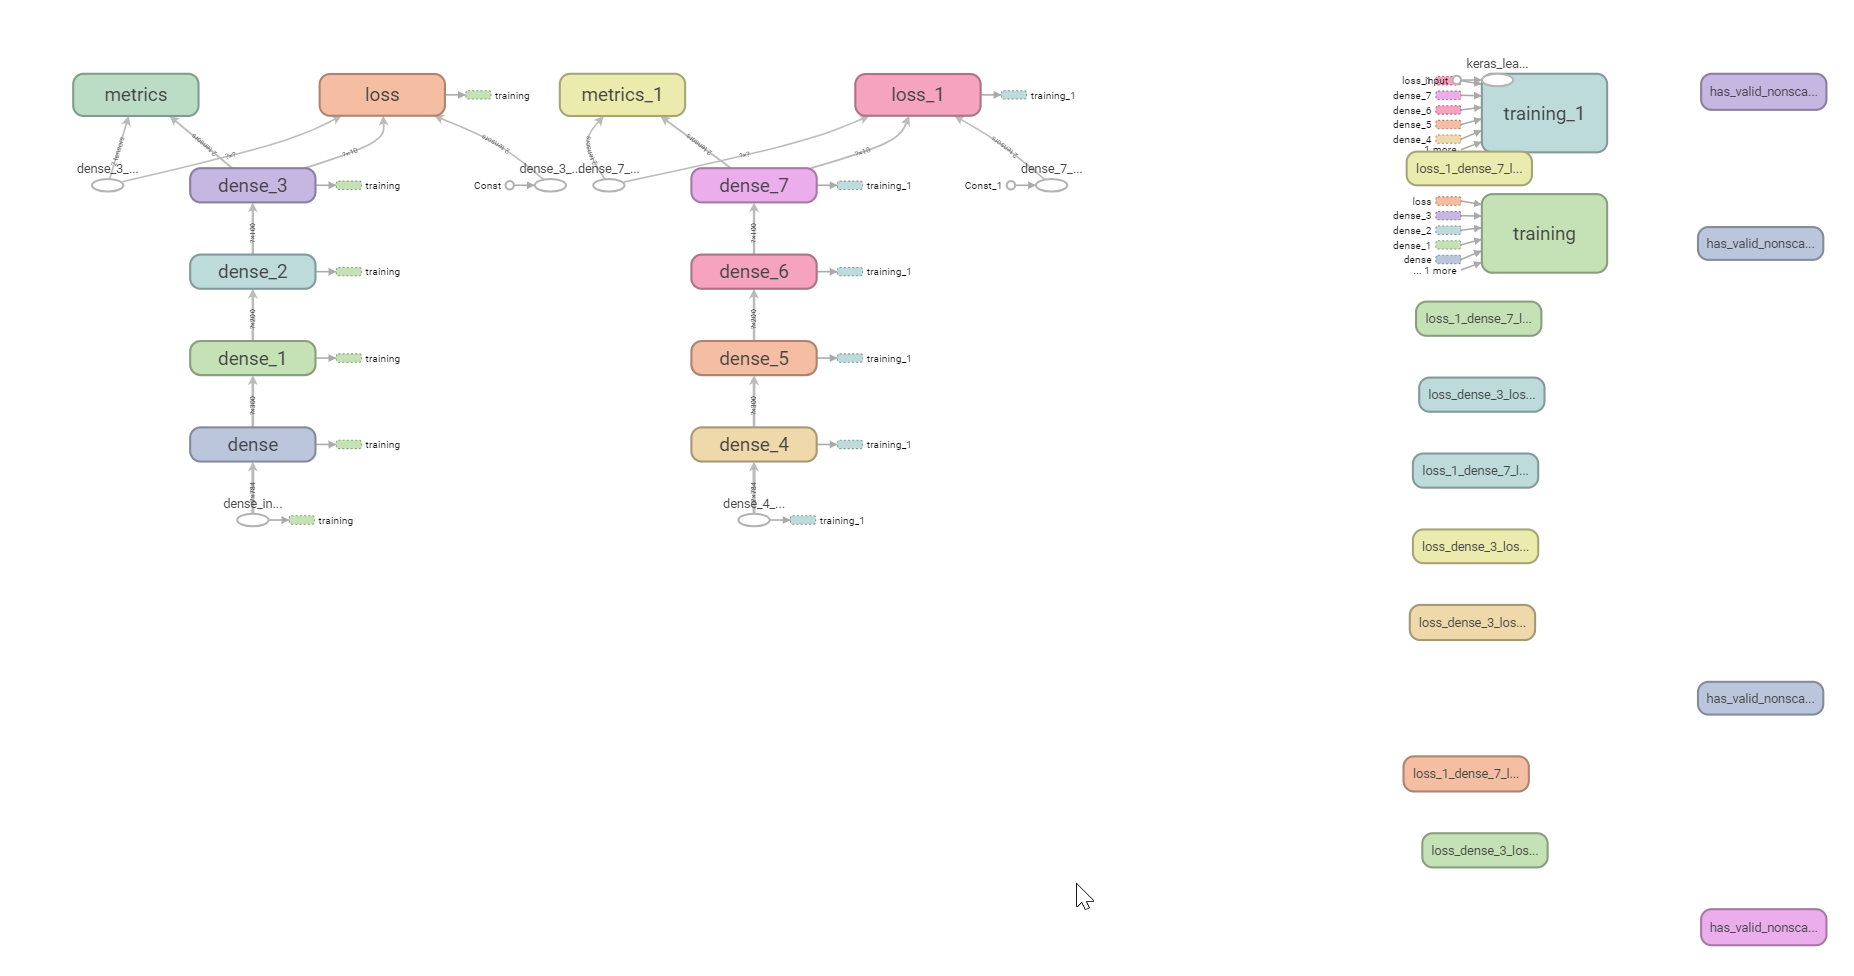

In [0]:
from IPython.display import Image
Image(filename="q2_tensorboard.png")

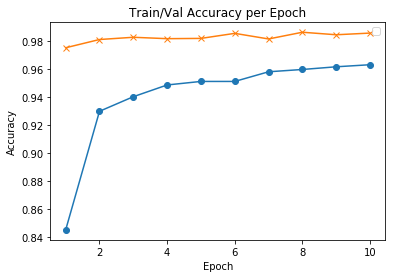

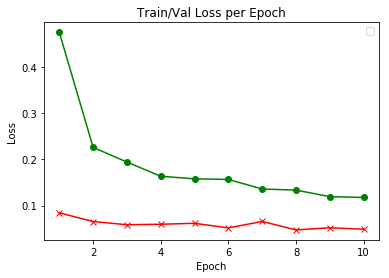

In [0]:
# Plot of performance results
plot_loss_acc(history_vgg)

**EXTRA CREDIT Q.** **(MANDATORY for students taking IND ENG 290)** Customize your neural networks in **Q1** to how many ever layers you want, use [batch normalization](https://www.tensorflow.org/api_docs/python/tf/layers/batch_normalization) and [Adam Optimizer](https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer) and try different regularization techniques to combat overfitting. Also use as many iterations you want and plot every 10th iteration on the tensorboard. We will give extra credit if you achieve more than **98.5%** on the MNIST data. **Plot the neural network graph (using tensorboard) and describe the settings that you used and the performance results. Also plot performance results (Training and Validation accuracies & loss) for every epoch**

Note: You can use Keras if necessary for solving this question

If you cannot run your tensorflow notebooks locally, you can use. 
https://datahub.berkeley.edu/hub/home

### Construct the model

In [0]:
# Load libraries
from tensorflow.keras.layers import BatchNormalization

# Initialize model
model_opt = Sequential()

# Add layers
model_opt.add(Dense(1024, activation=tf.nn.relu, input_shape=(784,))) # hidden layer 1
model_opt.add(BatchNormalization())
model_opt.add(Dropout(0.5))
model_opt.add(Dense(512, activation=tf.nn.relu)) # hidden layer 2
model_opt.add(BatchNormalization())
model_opt.add(Dropout(0.5))
model_opt.add(Dense(128, activation=tf.nn.relu)) # hidden layer 3
model_opt.add(BatchNormalization())
model_opt.add(Dropout(0.5))
model_opt.add(Dense(10, activation='softmax')) # output layer

# Compile the model
model_opt.compile(loss='sparse_categorical_crossentropy',
optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999,
                                epsilon=None, decay=0.0, amsgrad=False),
                                metrics=['accuracy'])

### Train the Model

In [0]:
# Train the model
NO_EPOCHS = 55
history_opt = model_opt.fit(x_train_trans, y_train,
                            batch_size=256,
                            epochs=NO_EPOCHS,
                            validation_split=0.2)
                           #callbacks=[tensorboard_callback])
# Test the model
test_scores = model_opt.evaluate(x_test_trans, y_test, verbose=0)
print('Test accuracy:', test_scores[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/55
48000/48000 [==============================] - 3s 66us/sample - loss: 0.4858 - accuracy: 0.8522 - val_loss: 0.3106 - val_accuracy: 0.9168
Epoch 2/55
48000/48000 [==============================] - 2s 47us/sample - loss: 0.2067 - accuracy: 0.9381 - val_loss: 0.1228 - val_accuracy: 0.9622
Epoch 3/55
48000/48000 [==============================] - 2s 45us/sample - loss: 0.1588 - accuracy: 0.9526 - val_loss: 0.0948 - val_accuracy: 0.9718
Epoch 4/55
48000/48000 [==============================] - 2s 45us/sample - loss: 0.1289 - accuracy: 0.9618 - val_loss: 0.0915 - val_accuracy: 0.9726
Epoch 5/55
48000/48000 [==============================] - 2s 46us/sample - loss: 0.1084 - accuracy: 0.9675 - val_loss: 0.0808 - val_accuracy: 0.9758
Epoch 6/55
48000/48000 [==============================] - 2s 45us/sample - loss: 0.0993 - accuracy: 0.9701 - val_loss: 0.0865 - val_accuracy: 0.9745
Epoch 7/55
48000/48000 [==============================] 

In [0]:
#Plot the neural network
print(logdir)

# Run tensorboard in the shell
!tensorboard --logdir $logdir --host=localhost

/tmp/tf_logs/r20190427191931/
TensorBoard 1.14.0a20190301 at http://localhost:6006 (Press CTRL+C to quit)


### For some reason my tensorboard graph will not clear or update, so this appears very similar to the first tensorboard graph from question 1

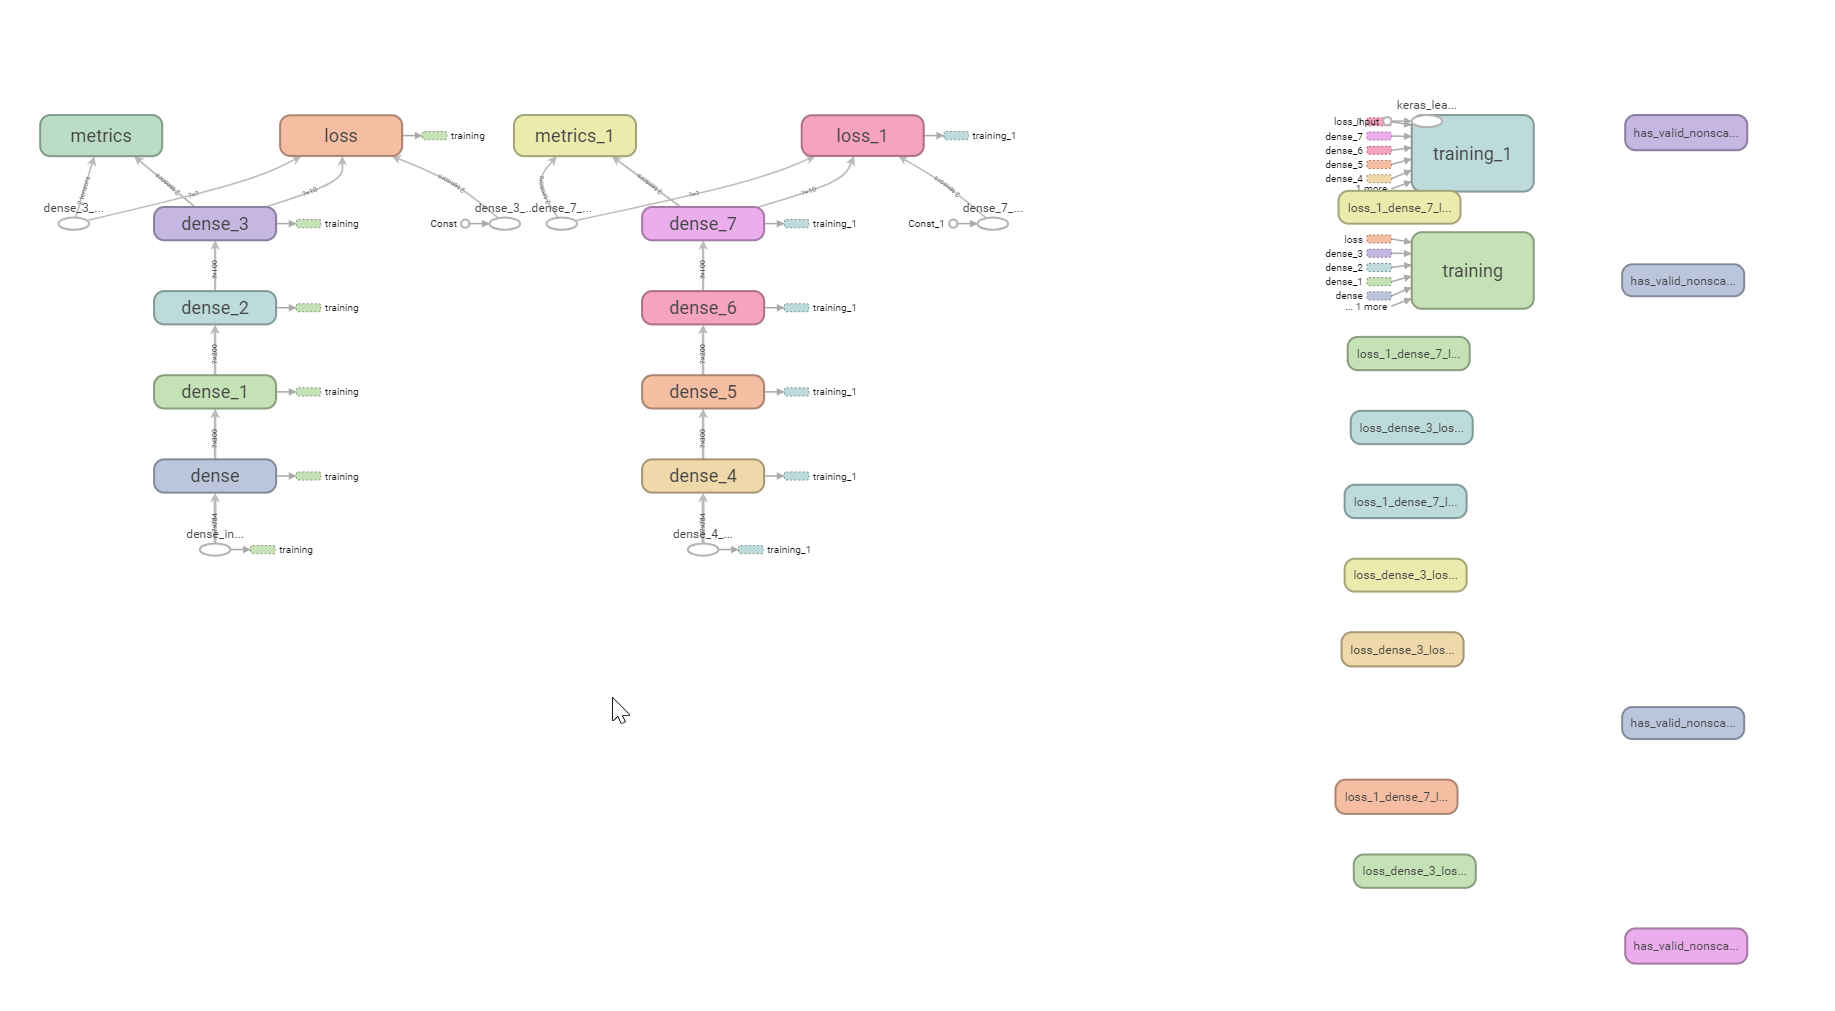

In [0]:
from IPython.display import Image
Image(filename="q3_tensorboard.png")

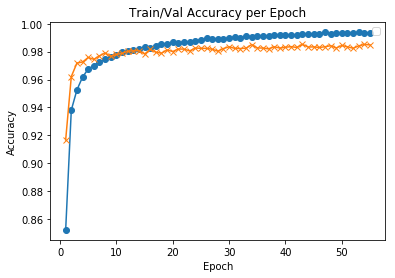

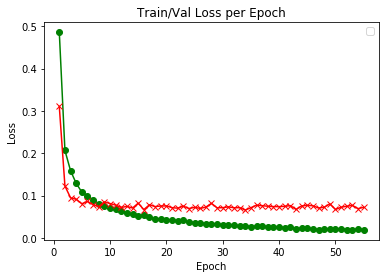

In [0]:
# Plot of performance results
plot_loss_acc(history_opt)

### Describe the settings that you used and the performance results

I trained a dense 3 hidden layer neural network with 1024, 512, and 156 nodes in each layer respectively. Batch normalization is performed on the hidden layer activations. Dropout is performed at every hidden layer with a probability of 0.5.  The Adam optimizer was used with a learning rate of 0.001, beta_1 value of 0.9, and beta_2 value of 0.999. Using these network settings, the model is able to reach a test accuracy of 98.58% which is greater than 98.5% after 55 epochs.